Installing Py OD Library

In [ ]:
pip install pyod

     |████████████████████████████████| 105 kB 5.3 MB/s 
  Created wheel for pyod: filename=pyod-0.9.0-py3-none-any.whl size=122560 sha256=51eb7a0d3451b4484bed0c7f3536266f6e1dff09e7e860b94078443788572ac6
  Stored in directory: /root/.cache/pip/wheels/42/5f/59/5984a6116a4d19aee28d8ebeffd431364ce1cf21eb73a6ad34
Successfully built pyod


Importing the libraries

In [ ]:
import pandas as pd
import numpy as np

# Import models
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
# from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

Reading the preparsed training csv file

In [ ]:
df = pd.read_csv("Train_CEF.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Defining the data preproccessing function

In [ ]:
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
def data_preproc (tempdf):
  tempdf = tempdf.replace(np.nan, 0)
  signature_ids= list(set(tempdf.signature_id))
  enc_sid = list()
  for i in tempdf.signature_id:
    enc_sid.append(signature_ids.index(i))
  tempdf.signature_id = enc_sid

  names= list(set(tempdf.name))
  enc_name = list()
  for i in tempdf.name:
    enc_name.append(names.index(i))
  tempdf.name = enc_name

  behs= list(set(tempdf.categoryBehavior))
  enc_behs = list()
  for i in tempdf.categoryBehavior:
    enc_behs.append(behs.index(i))
  tempdf.categoryBehavior = enc_behs

  dvchs= list(set(tempdf.dvchost))
  enc_dvchs = list()
  for i in tempdf.dvchost:
    enc_dvchs.append( dvchs.index(i))
  tempdf.dvchost = enc_dvchs

  cat_ids= list(set(tempdf.cat))
  enc_cat = list()
  for i in tempdf.cat:
    enc_cat.append(cat_ids.index(i))
  tempdf.cat = enc_cat

  ags= list(set(tempdf.agt))
  enc_agt = list()
  for i in tempdf.agt:
    enc_agt.append(ags.index(i))
  tempdf.agt = enc_agt
  
  lin_nums= list(set(tempdf['Unnamed: 0']))
  nums = list()
  for i in tempdf['Unnamed: 0']:
    nums.append(lin_nums.index(i))
  tempdf['Unnamed: 0'] = nums

  lin_vers= list(set(tempdf.version))
  vers = list()
  for i in tempdf.version:
    vers.append(lin_vers.index(i))
  tempdf.version = vers

  dvcs= list(set(tempdf.dvc))
  enc_dvcs = list()
  for i in tempdf.dvc:
    enc_dvcs.append(dvcs.index(i))
  tempdf.dvc = enc_dvcs

  arts= list(set(tempdf.art))
  enc_arts = list()
  for i in tempdf.art:
    enc_arts.append(arts.index(i))
  tempdf.art = enc_arts

  rts= list(set(tempdf.rt))
  enc_rts = list()
  for i in tempdf.rt:
    enc_rts.append(rts.index(i))
  tempdf.rt = enc_rts

  dts= list(set(tempdf.dtz))
  enc_dts = list()
  for i in tempdf.dtz:
    enc_dts.append(dts.index(i))
  tempdf.dtz = enc_dts

  catds= list(set(tempdf.catdt))
  enc_catds = list()
  for i in tempdf.catdt:
    enc_catds.append(catds.index(i))
  tempdf.catdt = enc_catds

  sevs= list(set(tempdf.severity))
  enc_sevs = list()
  for i in tempdf.severity:
    enc_sevs.append(sevs.index(i))
  tempdf.severity = enc_sevs

  amacs= list(set(tempdf.amac))
  enc_amacs = list()
  for i in tempdf.amac:
    enc_amacs.append(amacs.index(i))
  tempdf.amac = enc_amacs
  scaler = MinMaxScaler(feature_range=(0, 1))
  tempdf[['version','signature_id','name','categoryBehavior','cat','dvchost','agt','dvc','art','rt','dtz','catdt','severity','amac',]] = scaler.fit_transform(tempdf[['version','signature_id','name','categoryBehavior','cat','dvchost','agt','dvc','art','rt','dtz','catdt','severity','amac',]])
  return tempdf

In [ ]:
df = data_preproc(df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
from numpy import percentile

In [ ]:
from joblib import dump, load

Defining the training function for the PyOD Isolation Forest Model Object

In [ ]:
# ['version', 'device_vendor', 'device_product', 'device_version', 'signature_id', 'name','categoryBehavior', 'cs5', 'cat', 
# 'dvchost', 'ahost', 'atz', '_cefVer', 'cs2Label', 'agt', 'cs4', 'dst', 'cn1', 'deviceSeverity', 'src', 'at', 'mrt', 'cn1Label', 
# 'spt', 'categorySignificance', 'dvc', 'cs3', 'art', 'shost', 'msg', 'cs6', 'categoryObject', 'cs3Label', 'rt', 'categoryOutcome', 
# 'destinationZoneURI', 'eventId', 'fileType', 'cs6Label', 'cs2', 'av', 'dhost', 'deviceZoneURI', 'dtz', 'catdt', 'severity', 'amac', 'sourceZoneURI', 
# 'cs4Label', 'categoryDeviceGroup', 'cs5Label']


# 'signature_id','name','categoryBehavior','cat','dvchost','agt','dvc','art','rt','dtz','catdt','severity','amac'
def if_train(tempdf):
  tempdf = tempdf[['version','signature_id','name','categoryBehavior','cat','dvchost','agt','dvc','art','rt','dtz','catdt','severity','amac',]]
  scaler=StandardScaler()
  scaler.fit(tempdf)
  scaled_data=scaler.transform(tempdf)
  pca=PCA(n_components=2)
  pca.fit(scaled_data)
  x_pca = pca.transform(scaled_data)
  tempdf = pd.DataFrame(data = x_pca, index = list(range(0,len(x_pca[:,0]))), columns = ["prop1","prop2"])
  X1 = tempdf['prop1'].values.reshape(-1,1)
  X2 = tempdf['prop2'].values.reshape(-1,1)
  X = np.concatenate((X1,X2),axis=1)
  clf =IForest(contamination=0.05,random_state=0)
  clf.fit(X)
  dump(clf, 'if.joblib')

Executing the training function

In [ ]:
if_train(x_pca)

Defining the prediction function

In [ ]:
def IF(tempdf):
  global df1
  temp = tempdf[['version','signature_id','name','categoryBehavior','cat','dvchost','agt','dvc','art','rt','dtz','catdt','severity','amac',]]
  scaler=StandardScaler()
  scaler.fit(temp)
  scaled_data=scaler.transform(temp)
  pca=PCA(n_components=2)
  pca.fit(scaled_data)
  x_pca = pca.transform(scaled_data)
  temp = pd.DataFrame(data = x_pca, index = list(range(0,len(x_pca[:,0]))), columns = ["prop1","prop2"])
  X1 = temp['prop1'].values.reshape(-1,1)
  X2 = temp['prop2'].values.reshape(-1,1)
  X = np.concatenate((X1,X2),axis=1)
  outliers_fraction = 0.05
  xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
  
  obj = load('if.joblib')
  y_pred = obj.predict(X)
  scores_pred = obj.decision_function(X) * -1
  
  n_inliers = len(y_pred) - np.count_nonzero(y_pred)
  n_outliers = np.count_nonzero(y_pred == 1)
  plt.figure(figsize=(8, 8))
  # copy of dataframe
  df1 = tempdf
  df1['outlier'] = y_pred.tolist()
    
  # sales - inlier feature 1,  profit - inlier feature 2
  inliers_sales = np.array(temp['prop1'][df1['outlier'] == 0]).reshape(-1,1)
  inliers_profit = np.array(temp['prop2'][df1['outlier'] == 0]).reshape(-1,1)
    
  # sales - outlier feature 1, profit - outlier feature 2
  outliers_sales = temp['prop1'][df1['outlier'] == 1].values.reshape(-1,1)
  outliers_profit = temp['prop2'][df1['outlier'] == 1].values.reshape(-1,1)
         
  print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
  # ============ for countor plot =======
  
  # # threshold value to consider a datapoint inlier or outlier
  # threshold = percentile(scores_pred, 100 * outliers_fraction)
        
  # # decision function calculates the raw anomaly score for every point
  # Z = obj.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
  # Z = Z.reshape(xx.shape)
  # # fill blue map colormap from minimum anomaly score to threshold value
  # plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
  # # draw red contour line where anomaly score is equal to thresold
  # a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
  # # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
  # plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
  # b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
  # c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
  # plt.axis('tight')  
     
  # plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],)
  #         #  prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')
      
  # plt.xlim((0, 1))
  # plt.ylim((0, 1))
  # plt.title('Isolation Forest')
  # plt.show();

Setting up variables for storing output data

In [ ]:
df1 = pd.DataFrame()

Defining function to get the outlier indices

In [ ]:
def out_idx(tempdf):
  index = tempdf.index
  condition = tempdf["outlier"] == 1
  outlier_indices = index[condition]
  return outlier_indices

Testing the model with the training data

In [ ]:
IF(df)

OUTLIERS: 105140 INLIERS: 2689


<Figure size 576x576 with 0 Axes>

In [ ]:
df1

Defining function to get the color map for the graph display

In [ ]:
import numpy
colormap = numpy.array(['b','r'])
def get_cats(tempdf):
  categories = numpy.array(list(tempdf.outlier))
  return categories

Displaying the model results when the training data is passed for prediction

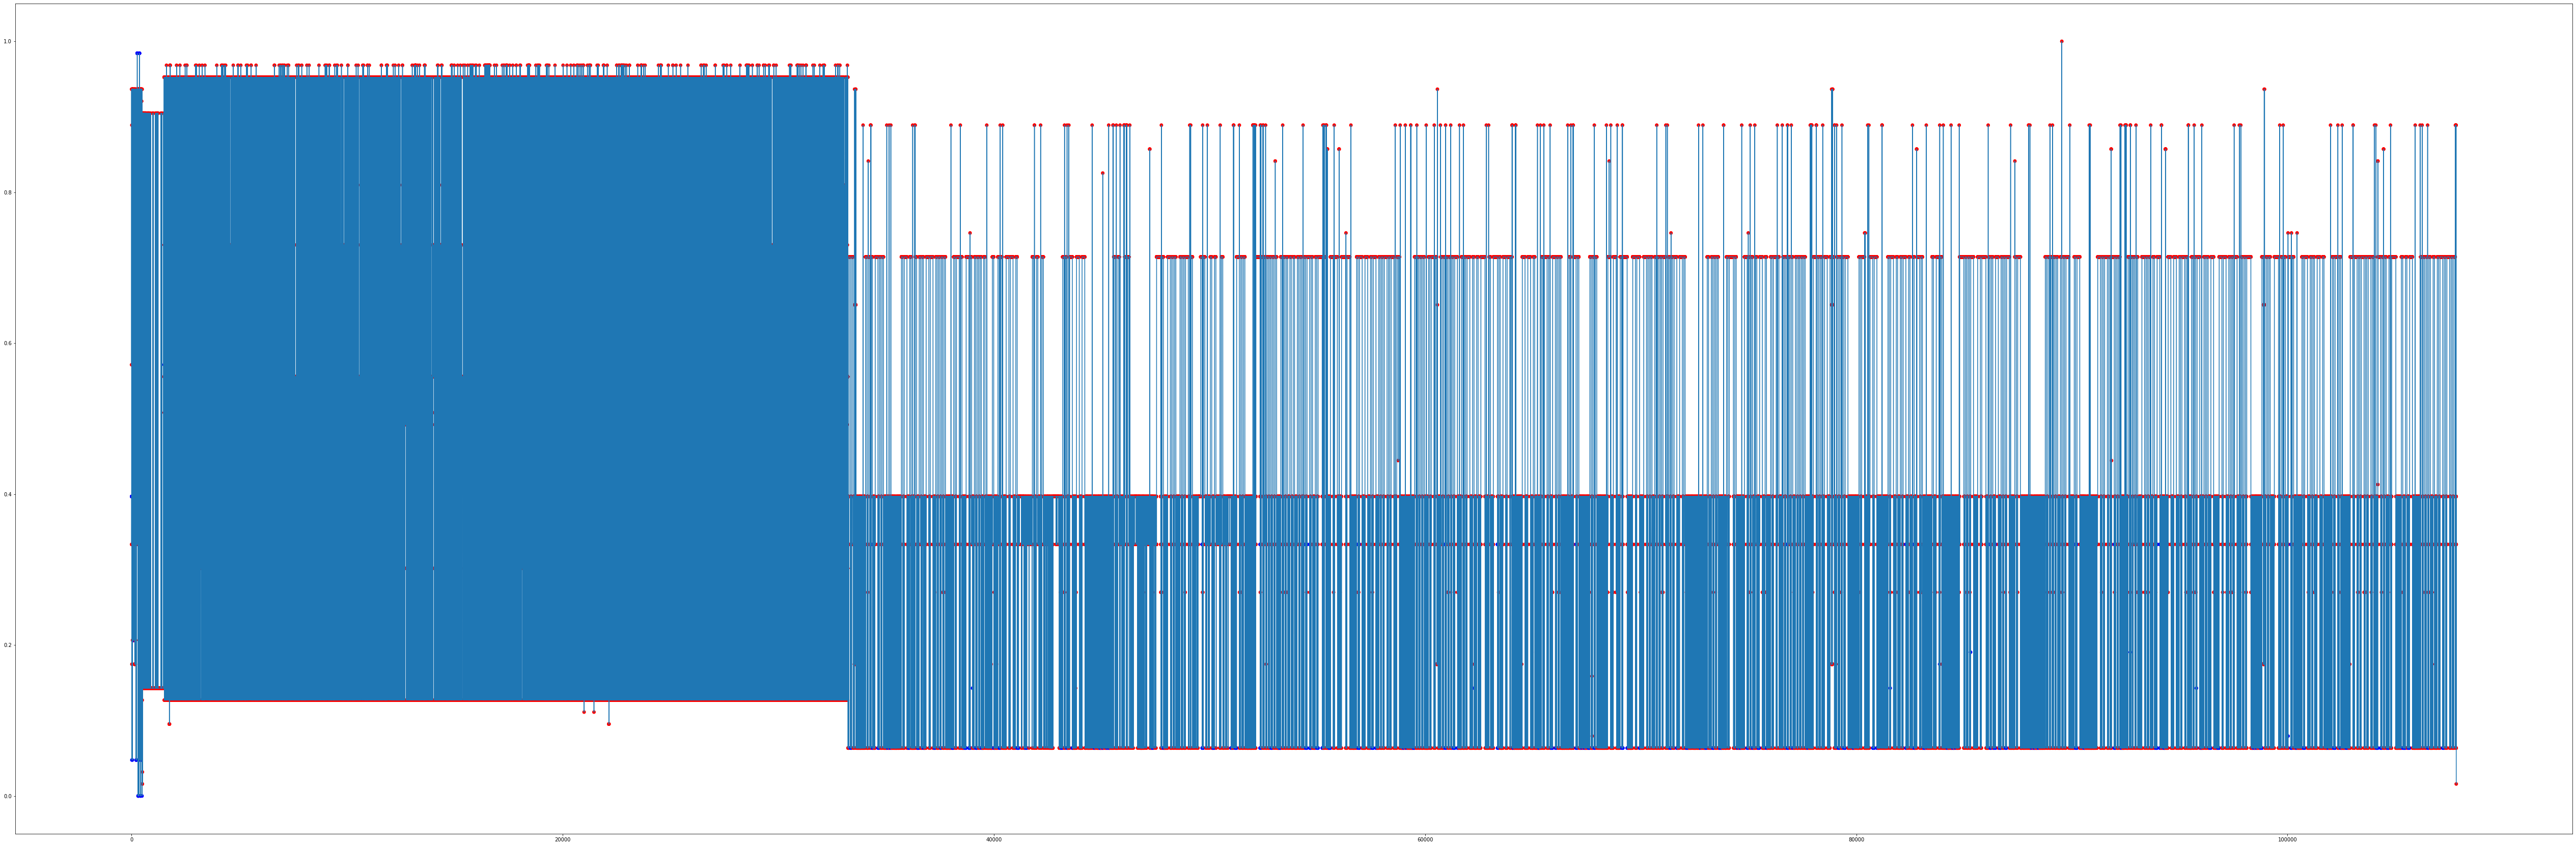

In [ ]:
plt.figure(figsize=(90, 30))
plt.scatter(list(range(df1.shape[0])), df1.signature_id, c=colormap[get_cats(df1)])
plt.plot(list(range(df1.shape[0])),df1.signature_id)

Testing the model with with new data
1. keep the parser code readt
2. read the file and parse it. 
3. store the paresed file in new dataframe
4. save the datadrame in a CSV format
5. read the csv file and apply the data preprocessing function
6. passed the proccessed data to the prediction function
7. display the outlier graph

In [ ]:
import re
import json
import itertools

def recordToJson(record):
    cefFields = ['version', 'device_vendor', 'device_product', 'device_version', 'signature_id', 'name', 'severity', 'extension']
    regex = re.compile(r'''[\S]+=(?:\s*(?!\S+=)\S+)+''', re.VERBOSE)
    extension = {}
    for pair in regex.findall(record):
        split = pair.split("=",1)
        extension[split[0]]=split[1]
    cefRecord={}
    cefData = record.split("| ")[0].split("|")
    # cefData.append(extension)
    for i in range(0,len(cefFields)):
      cefRecord[cefFields[i]] =  cefData
    cefRecord.update(extension)

    return cefRecord

In [ ]:
with open('2021-05-04-00-57-28.cef') as f:
    lines1 = f.readlines()

In [ ]:
list1_o=list()
for i in range(0,len(lines1)):
  o = recordToJson(lines1[i])
  list1_o.append(o)
df2 = pd.DataFrame(list1_o)
df2.to_csv('CEF_2021-05-04-00-57_cef.csv')

In [ ]:
df2 = pd.read_csv('CEF_2021-05-04-00-57_cef.csv')
df2 = data_preproc(df2)

In [ ]:
IF(df2)

OUTLIERS: 382 INLIERS: 112


<Figure size 576x576 with 0 Axes>

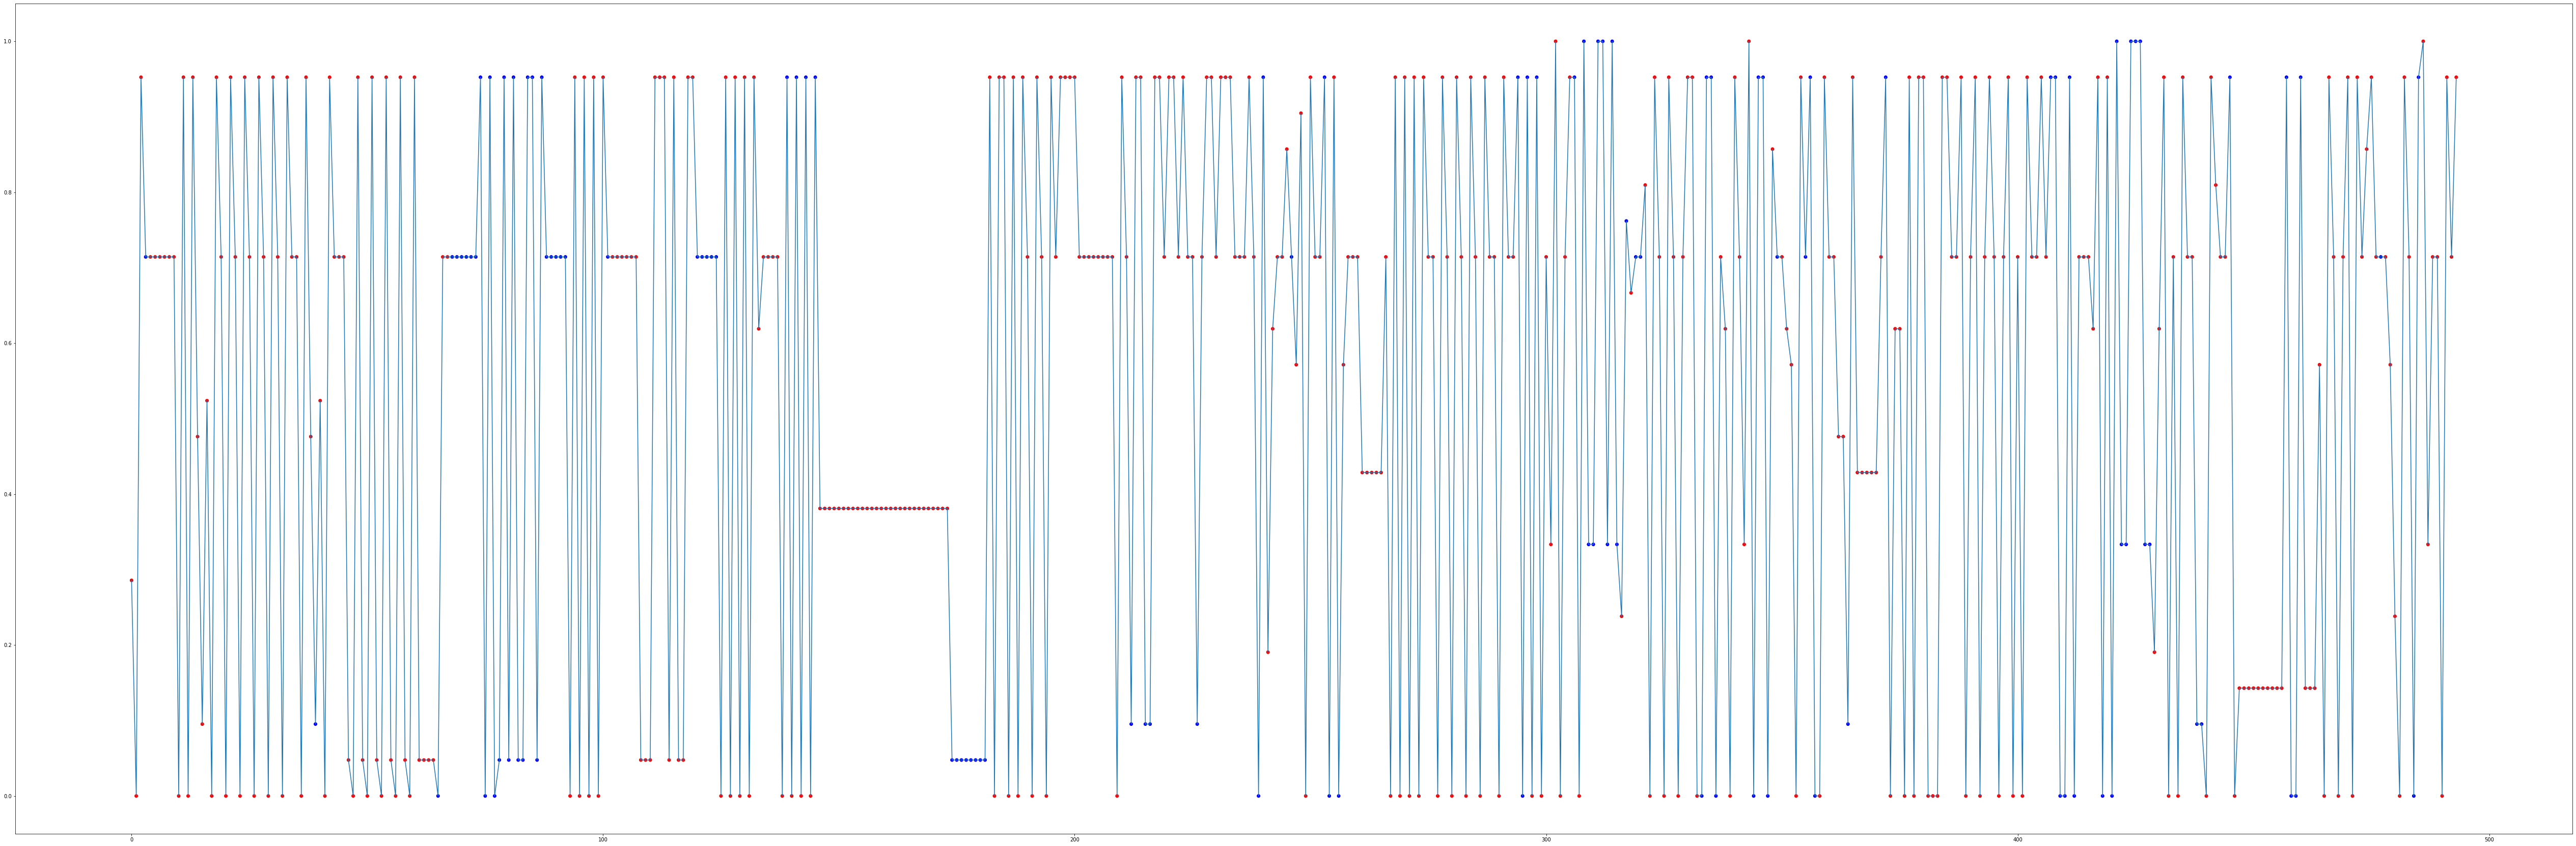

In [ ]:
plt.figure(figsize=(90, 30))
plt.scatter(list(range(df1.shape[0])), df1.signature_id, c=colormap[get_cats(df1)])
plt.plot(list(range(df1.shape[0])),df1.signature_id)